In [1]:
from mpl_toolkits import mplot3d


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# projection='3d'
Once this submodule is imported, a three-dimensional axes can be created by passing the keyword 

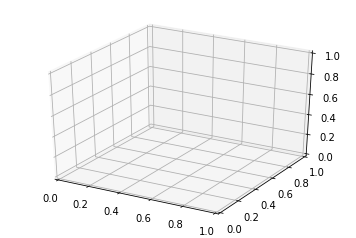

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Three-dimensional Points and Lines

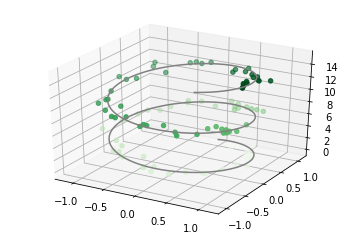

In [6]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
# ax.plot3D ->  Simple Line Plots
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

# ax.scatter3D -> 
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

# Three-dimensional Contour Plots

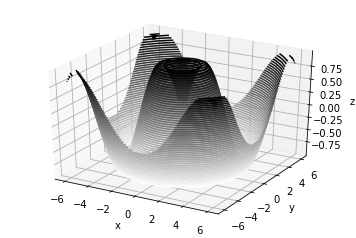

In [7]:
# ax.contour3D  likes ax.contour plots
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

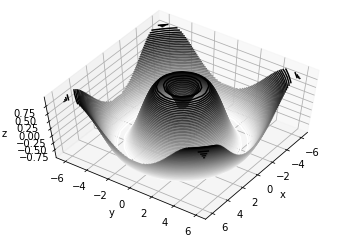

In [9]:
# view_init method -> set the elevation and azimuthal angles.

ax.view_init(60, 35)
fig

# Wireframes and Surface Plots

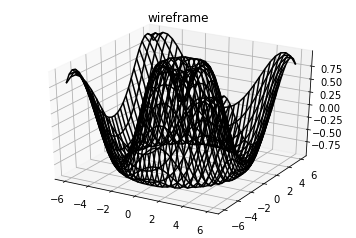

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#
ax.plot_wireframe(X, Y, Z, color='black')

# ax.contour3D(X, Y, Z, 50, cmap='binary')
# wireframes (线框) and surface plots. These take a grid of values and project 
# it onto the specified three-dimensional surface, 
# and can make the resulting three-dimensional forms quite easy to visualize.
ax.set_title('wireframe');

In [ ]:
# A surface plot is like a wireframe (线框) plot, but each face of the wireframe is a filled polygon. 
# Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

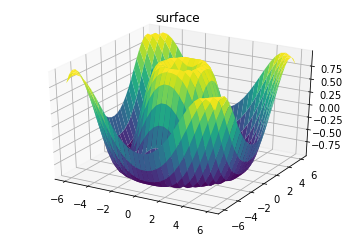

In [14]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface');

# A partial polar grid

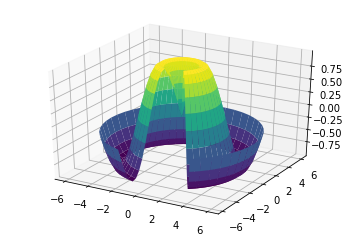

In [17]:
# Note that though the grid of values for a surface plot needs to be two-dimensional, 
# it need not be rectilinear(直线运动的). Here is an example of creating a partial polar grid, 
# which when used with the surface3D plot can give us a slice into the function we're visualizing:

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

# Surface Triangulations 曲面三角剖分

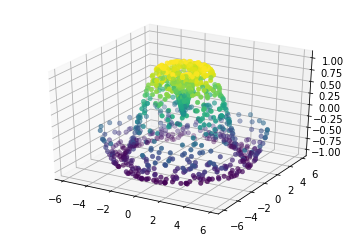

In [18]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
# Return a contiguous flattened array.
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);   #viridis 翠绿色

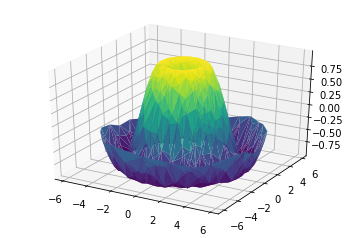

In [19]:
# This leaves a lot to be desired. The function that will help us in this case is ax.plot_trisurf, 
# which creates a surface by first finding a set of triangles formed between adjacent points 
# (remember that x, y, and z here are one-dimensional arrays):
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none');

# Example: Visualizing a Möbius strip （莫比乌斯带）

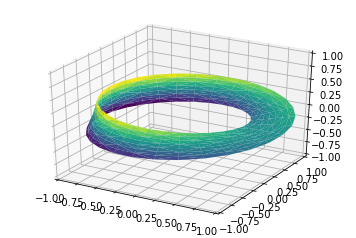

In [21]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# triangulate in the underlying parametrization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
                cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);